In [158]:
!pip install googlesearch-python


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [159]:
!pip install seaborn --upgrade


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [160]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [161]:
!pip install geopy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [162]:
!pip install scrapy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [163]:
%pip install --upgrade bs4


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [164]:
%pip install --upgrade lxml


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [165]:
!pip install requests


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from bs4 import BeautifulSoup
from IPython.display import HTML
import scrapy
from scrapy.crawler import CrawlerProcess
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import folium
import re
from sympy import symbols, Eq, solve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import networkx as nx
from geopandas.tools import geocode
from geopy.exc import GeocoderTimedOut
import csv

# What is the best city?

### In our project we will be researching cities and countries. We will look at different characteristics such as price level, salaries, cost of real estate and groceries in a shop and based on these factors we will make a conclusion about which city (or cities) is the best. We will also learn how to predict the price of coffee in different cities based on the cost of a certain set of products (since the author of this project is obsessed with coffee). 

### Note the practical usefulness of this project: due to the current geopolitical situation, some people are thinking about emigration and it is important for them to know which cities are suitable and not suitable for them and why. 

### Stay tuned! and follow my research...

1) Working with REST API (XML/JSON) - we will load data about salaries in different cities from the site "https://api.teleport.org/api/urban_areas/" using API.

2) Web scraping - we will scrape data by country via Scrapy (see attached python file and received output file with data). For some local small tasks, where Scrapy is unnecessary, we will use Beautiful Soup library.

3) Pandas will be used actively for grouping and transforming data

4) We will use regular expressions to search the site for certain patterns (in our task we will search the site for the best cities - pattern "1. {some city}")

5) We will use mathematical capabilities of Python to calculate the monthly mortgage payment and compare cities in this way. We will also calculate Housing Affordability for each city.

6) We will use geodata to visualise the cities on the map and colour them according to the average salary level. We will also use them to get the coordinates of countries and define their continent accordingly 

7) Draw a graph in which the countries located on the same continent are connected by edges. We will sign the components of the connectivity and in each we will find the country that has the highest Cost of Living. 

8) We will visualise it.

9) We will use SQL for simplified queries to the table and find out which cities have the most expensive coffee.

If you were asked what is the best city in the world, what would you do first? The author of this project decided to take it easy, typed "What is the best city in the world?" into Google and followed the very first link:

In [7]:
response = requests.get('https://www.worldsbestcities.com/rankings/worlds-best-cities/')
soup = BeautifulSoup(response.content, 'html.parser')

text = soup.get_text()

pattern = r'Download Full Report\s+\d\.\s+([A-Za-z\s]*?)(?=\s[^A-Za-z])'
best_cities = re.findall(pattern, text)

print(best_cities[:10])

['London', 'Paris', 'New York', 'Tokyo', 'Dubai', 'Barcelona', 'Rome', 'Madrid', 'Singapore']


Now let's do our own research. Let's start from afar - let's compare countries.

We will download the country data from the website (https://www.numbeo.com/cost-of-living/rankings_by_country.jsp). We will do this using the scrapy library, which we will run locally on the computer. You can see the code in the additional attached file.

Overview of the cost of living indices on this site: The cost of living indices on this site are for New York City (NYC), with a base index for NYC of 100%. Below is a description of each index and its value:

1) Cost of Living Index: This index shows the relative prices of consumer goods such as food, restaurants, transport and utilities. It does not take into account living expenses such as rent or mortgages. For example, a city with a cost of living index of 120 is estimated to be 20% more expensive than New York City (excluding rent). 

2) Rent Index: This index evaluates the rental prices of flats in the city compared to New York City. If the Rent Index is 80, it means that the average rental prices in this city are about 20% lower than New York City.

3) Groceries Index: This index gives an estimate of food prices in the city compared to New York City. Numbeo uses the product weights from the Markets section to calculate this index for each city.

4) Restaurant Price Index: This index compares food and drink prices in restaurants and bars to prices in New York City.

5) Cost of Living Plus Rent Index: This index measures the prices of consumer goods, including rent, compared to prices in New York City.

6) Local Purchasing Power Index: This index shows the relative purchasing power in a given city based on average net wages. A local purchasing power of 40 means that residents of an average wage city can afford on average 60 per cent less goods and services than residents of an average wage New York City.

In [237]:
df = pd.read_csv('numbeo_data.csv')
df['Country'] = df['Country'].replace('United States', 'United States of America')
print(df['Cost of Living Plus Rent Index'].min())
print(df['Cost of Living Plus Rent Index'].max())

11.0
120.0


What a huge variation in the cost of living!

In [238]:
df.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Bermuda,141.8,96.3,120.0,143.3,142.0,79.5
1,Switzerland,114.2,50.2,83.5,113.9,109.5,118.7
2,Cayman Islands,103.4,75.7,90.1,96.4,92.4,76.7
3,Bahamas,90.9,39.6,66.3,74.1,94.8,43.2
4,Barbados,88.8,21.2,56.4,80.1,82.7,36.8


Now for each continent, let's find the country with the most expensive standard of living and construct a graph:

In [239]:
def geocode_with_timeout(country):
    try:
        return geocode(country).geometry
    except GeocoderTimedOut:
        return geocode_with_timeout(country)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df['geometry'] = df['Country'].apply(geocode_with_timeout)

gdf = gpd.GeoDataFrame(df, geometry='geometry')

gdf = gpd.sjoin(gdf, world, how="left", op='intersects')
gdf['Continent'] = gdf['continent']
gdf.loc[gdf['Country'] == 'Switzerland', 'Continent'] = 'Europe'  

gdf = gdf.dropna(subset=['Continent'])

G = nx.Graph()

for _, country in gdf.iterrows():
    G.add_node(country['Country'], continent=country['Continent'], cost_of_living=country['Cost of Living Index'])

for continent in gdf['Continent'].unique():
    countries_in_continent = gdf[gdf['Continent'] == continent]['Country']
    for i, country1 in enumerate(countries_in_continent):
        for country2 in countries_in_continent[i + 1:]:
            G.add_edge(country1, country2)

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1016085441.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1016085441.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gd

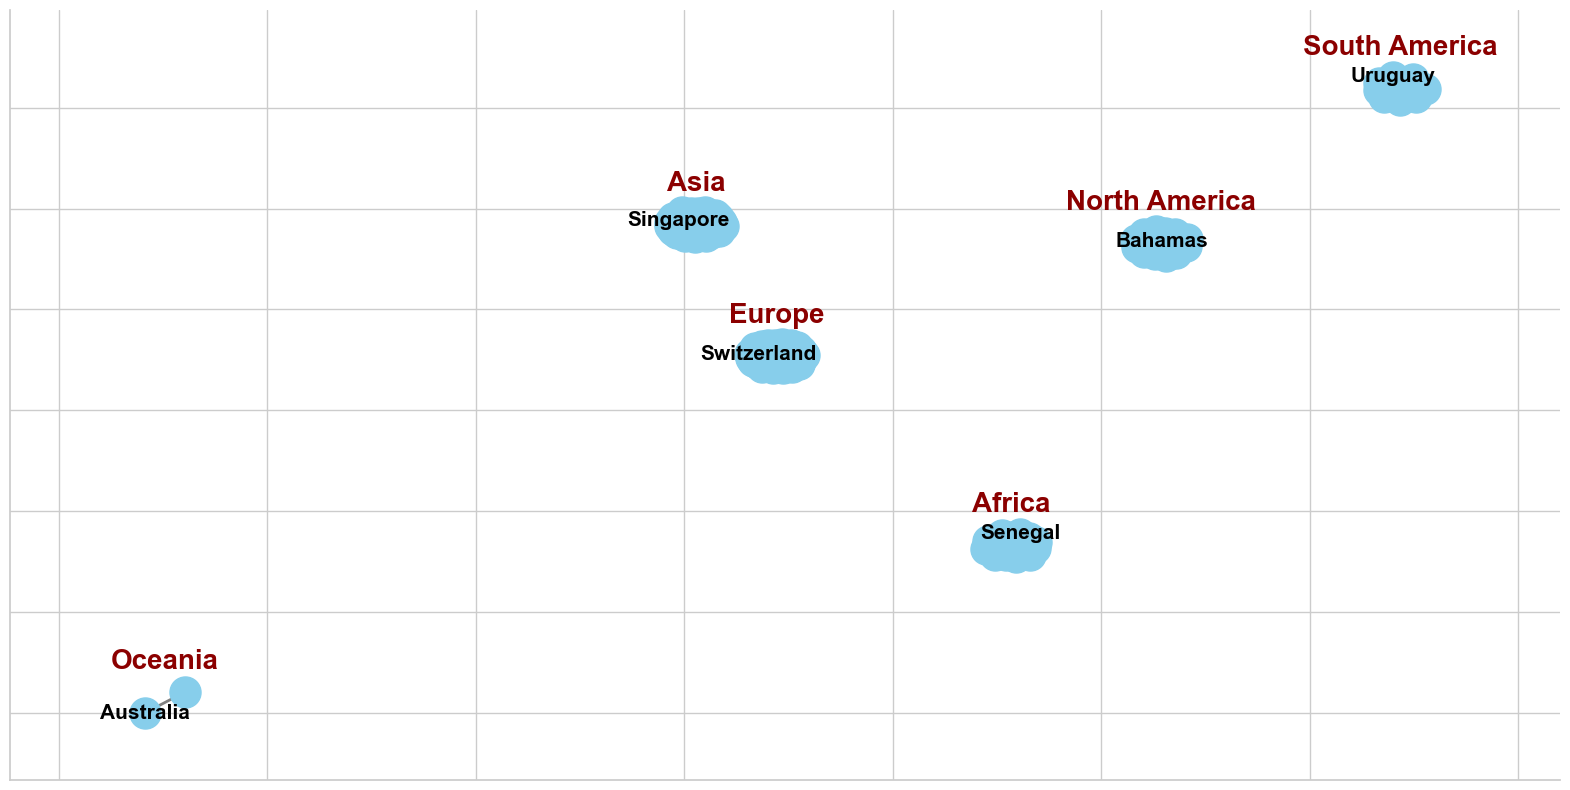

In [240]:
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(20, 10))

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

nx.draw_networkx_edges(G, pos, width=2, edge_color='grey')

max_cost_of_living_countries = gdf.loc[gdf.groupby('Continent')['Cost of Living Index'].idxmax()]['Country']

labels = {country: country for country in max_cost_of_living_countries}
nx.draw_networkx_labels(G, pos, labels, font_size=15, font_weight='bold')

continent_labels = {continent: continent for continent in gdf['Continent'].unique()}
continent_positions = {continent: sum(pos[country] for country in G.nodes if G.nodes[country]['continent'] == continent) / sum(G.nodes[country]['continent'] == continent for country in G.nodes) for continent in continent_labels}

for continent in continent_positions:
    continent_positions[continent][1] += 0.1

nx.draw_networkx_labels(G, continent_positions, continent_labels, font_size=20, font_color='darkred', font_weight='bold')

plt.show()

#### Intermediate conclusion: if you have decided on a continent to move to, and you don't want to lead an expensive lifestyle, it is worth crossing off the list of countries presented above.

It would be interesting to get more detailed information, so let's colour the countries on the map according to Cost of Living Plus Rent Index.

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1486273171.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


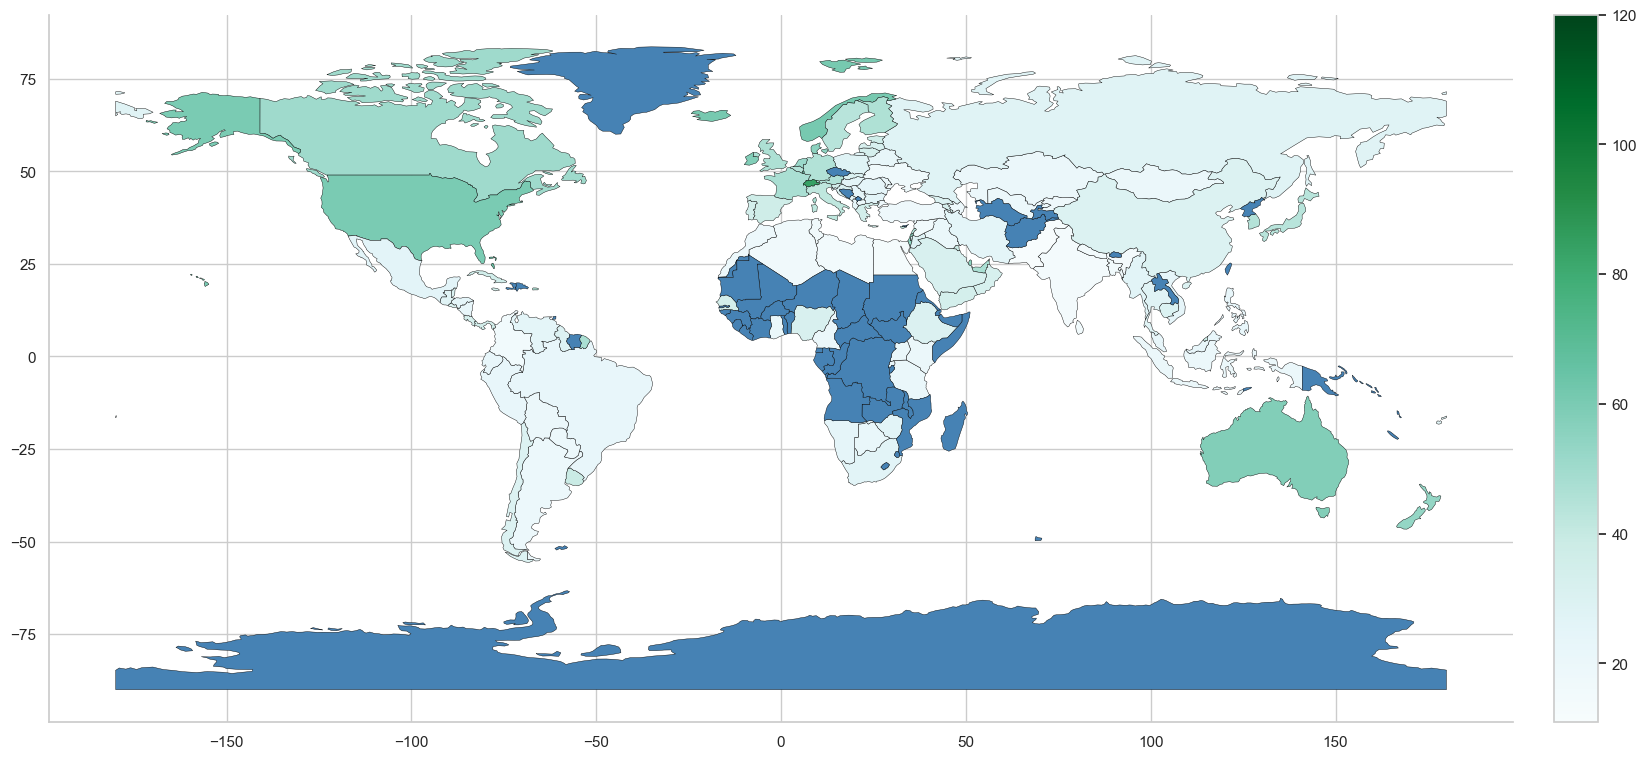

In [241]:
df = pd.read_csv('numbeo_data.csv')
df['Country'] = df['Country'].replace('United States', 'United States of America')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(df.set_index('Country'))

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.4)

merged.plot(column='Cost of Living Plus Rent Index', 
            cmap='BuGn', 
            linewidth=0.3, 
            ax=ax, 
            edgecolor='0', 
            legend=True, 
            cax=cax,
            vmin = df['Cost of Living Plus Rent Index'].min(),
            vmax = df['Cost of Living Plus Rent Index'].max(),
            missing_kwds={'color': 'steelblue'})
plt.show()


In [242]:
missing_countries_in_df = set(world['name']) - set(df['Country'])
print("Countries present in 'world' but missing in 'df':", missing_countries_in_df)

Countries present in 'world' but missing in 'df': {'Bosnia and Herz.', 'Malawi', 'Eritrea', 'Taiwan', 'Czechia', 'Sierra Leone', 'Guinea', 'Haiti', 'Suriname', 'Mauritania', 'Vanuatu', 'Liberia', 'Benin', 'Dominican Rep.', 'Turkmenistan', "Côte d'Ivoire", 'Madagascar', 'Guinea-Bissau', 'Niger', 'N. Cyprus', 'Somalia', 'Mali', 'S. Sudan', 'Bhutan', 'eSwatini', 'Gambia', 'Papua New Guinea', 'Falkland Is.', 'Solomon Is.', 'Eq. Guinea', 'Zambia', 'New Caledonia', 'Sudan', 'Dem. Rep. Congo', 'Trinidad and Tobago', 'Tajikistan', 'Antarctica', 'W. Sahara', 'Fr. S. Antarctic Lands', 'Angola', 'Congo', 'Gabon', 'Somaliland', 'North Korea', 'Togo', 'Central African Rep.', 'Kosovo', 'Burundi', 'Laos', 'Burkina Faso', 'Greenland', 'Chad', 'Lesotho', 'Timor-Leste', 'Djibouti', 'Afghanistan', 'Mozambique'}


Now let's look at the correlations between Cost of Living, Rent Index, Restaurant Index Grocery Index and the rest. The assumption is that Cost of Living is more strongly influenced by Rent Index than by Grocery Index.

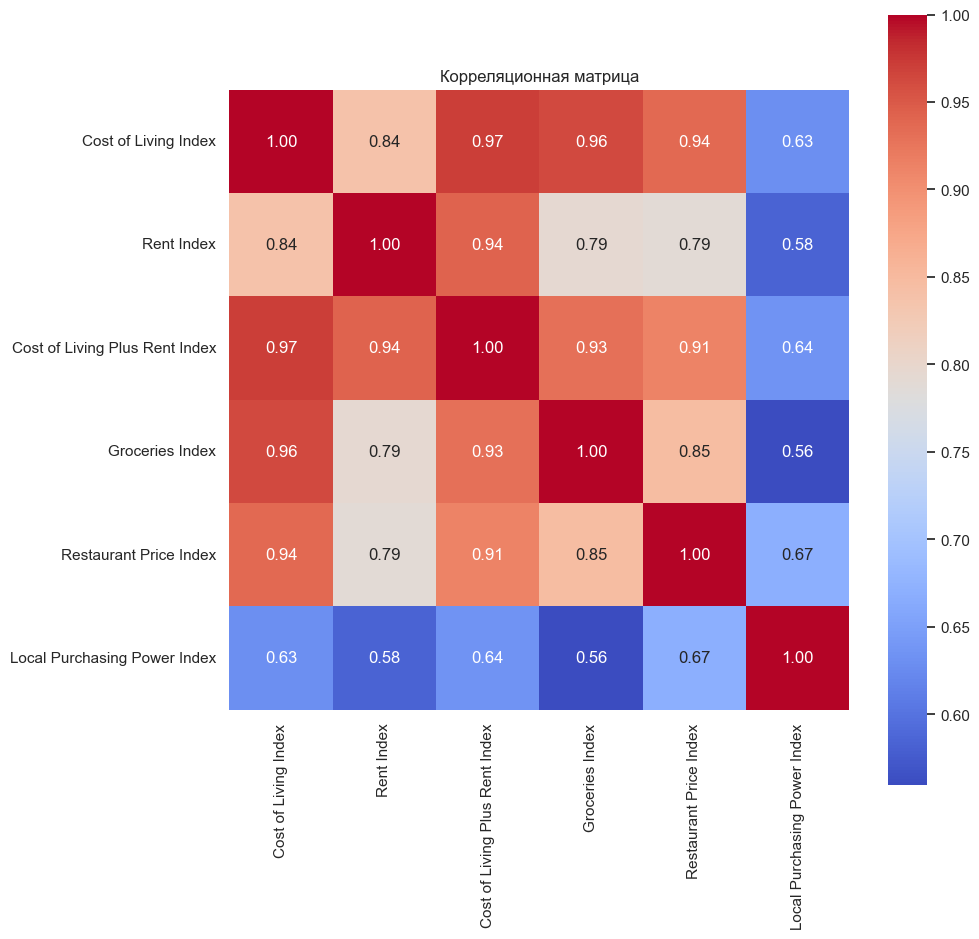

In [243]:
corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Корреляционная матрица')
plt.show()

Let's look at the relationship between the Cost of Living Index and the Local Purchasing Power Index. 

<AxesSubplot: xlabel='Cost of Living Index', ylabel='Local Purchasing Power Index'>

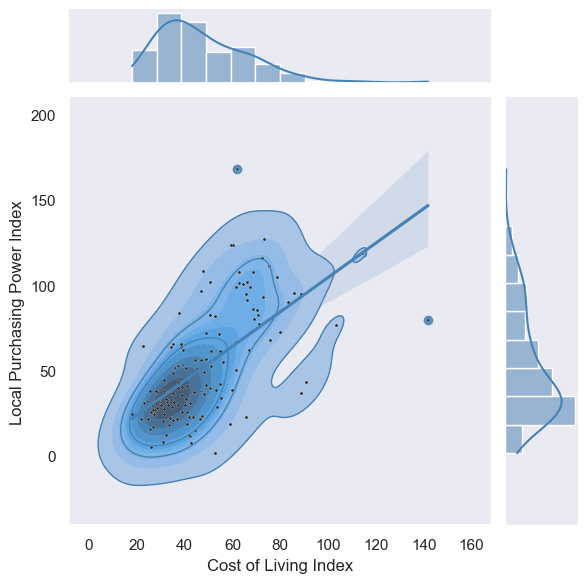

In [247]:
sns.set_theme(style="dark", palette=None)
sns.color_palette("icefire", as_cmap=True)

g = sns.jointplot(data=df, x="Cost of Living Index", y="Local Purchasing Power Index", color="steelblue", kind="reg")
g.plot_joint(sns.kdeplot, fill=True, color="steelblue")
sns.scatterplot(data=df, x="Cost of Living Index", y="Local Purchasing Power Index", s=5, color=".15")
sns.kdeplot(data=df, x="Cost of Living Index", y="Local Purchasing Power Index", levels=5, color="steelblue", linewidths=1)

#### We see that in general, the lower the purchasing power of a currency, the lower the cost of living. In a sense, this means that you should move to countries with weak currencies if you want to live cheaply. However, this is a double-edged sword - you will earn less in such countries. It should also be noted that the cost of living generally peaks at 30, meaning that the cost of living in the largest number of countries is 70% lower than in New York. Most countries have 60% less purchasing power than the dollar.

Let's test our hypothesis that the cost of living depends more on the cost of housing than on the cost of goods.

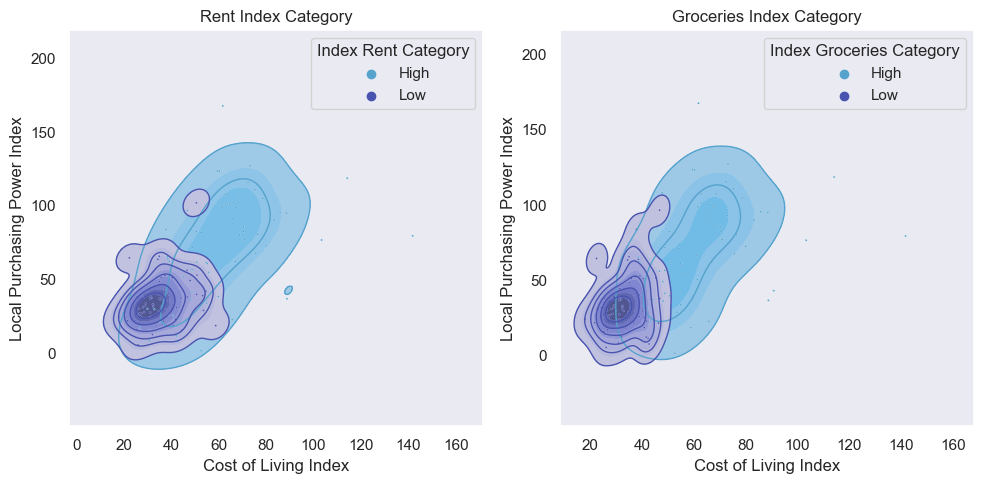

In [252]:
sns.set_theme(style="dark", palette='icefire')
sns.color_palette("icefire", as_cmap=True)
df['Index Rent Category'] = df['Rent Index'].apply(lambda x: 'High' if x > df['Rent Index'].median() else 'Low')
df['Index Groceries Category'] = df['Groceries Index'].apply(lambda x: 'High' if x > df['Groceries Index'].median() else 'Low')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(ax=ax[0], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Rent Category", fill=True, color="steelblue")
sns.kdeplot(ax=ax[0], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Rent Category", levels=7, color="b", linewidths=1)
sns.scatterplot(ax=ax[0], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Rent Category", s=2, color=".15")
sns.kdeplot(ax=ax[1], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Groceries Category", fill=True)
sns.kdeplot(ax=ax[1], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Groceries Category", levels=7, color="b", linewidths=1)
sns.scatterplot(ax=ax[1], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Groceries Category", s=2, color=".15")

ax[0].set_title("Rent Index Category")
ax[1].set_title("Groceries Index Category")

plt.tight_layout()
plt.show()


We see that there is almost no difference. This is quite a logical conclusion, because it is the relative value of goods that matters, not the real value: the ratio of the price of a flat to the price of coffee differs from country to country, but it is within a certain range (this is also because arbitrage is possible only for a short time, and money does not fall from the sky). We see that countries with high rental and commodity indices are much more smoothly distributed. 

#### One of the most important questions when moving is the question of salary. Let's examine it.

To do this, let's use the API to download salary data from https://api.teleport.org/api/urban_areas/. 

In [3]:
url = "https://api.teleport.org/api/urban_areas/"
response = requests.get(url)
data = response.json()

urban_areas = data['_links']['ua:item']
urban_area_links = [item['href'] for item in urban_areas]

df_salaries = pd.DataFrame()

for link in urban_area_links:
    salary_url = link + 'salaries/'
    response = requests.get(salary_url)
    salary_data = response.json()
    
    if 'salaries' in salary_data:
        salary_df = pd.json_normalize(salary_data['salaries'])
        
        salary_df['urban_area'] = link.split('/')[-2] 

        df_salaries = df_salaries.append(salary_df, ignore_index=True)
        
df_salaries['urban_area'] = df_salaries['urban_area'].astype(str)
df_salaries['urban_area'] = df_salaries['urban_area'].apply(lambda x: x.replace('slug:', '').strip())

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/4267852798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from 

In [254]:
df_salaries.tail()

,job.id,job.title,salary_percentiles.percentile_25,salary_percentiles.percentile_50,salary_percentiles.percentile_75,urban_area
13827,TEACHER,Teacher,47558.835896,62079.508647,81033.635943,zurich
13828,UX-DESIGNER,UX Designer,57051.828525,69953.967157,85773.894501,zurich
13829,WAITER,Waiter,31893.102141,43889.758734,60398.982614,zurich
13830,WEB-DESIGNER,Web Designer,55648.830068,76413.016652,104924.921273,zurich
13831,WEB-DEVELOPER,Web Developer,61189.321082,78944.860771,101852.593426,zurich


If a family moves, then in order for both of them to be able to work, there has to be a decent job for both of them! Let's look at the distribution of salaries within professions.

In [255]:
df_salaries['average_salary'] = df_salaries[['salary_percentiles.percentile_25', 
                           'salary_percentiles.percentile_50', 
                           'salary_percentiles.percentile_75']].mean(axis=1)

average_salaries = df_salaries.groupby('urban_area')['average_salary'].mean()

In [4]:
df_salaries['range'] = df_salaries['salary_percentiles.percentile_75'] - df_salaries['salary_percentiles.percentile_25']

df_salaries['max_range'] = df_salaries.groupby('job.title')['range'].transform('max')
df_salaries['min_range'] = df_salaries.groupby('job.title')['range'].transform('min')

top_5_titles = df_salaries.sort_values('max_range', ascending=False)['job.title'].drop_duplicates()[:5]
bottom_5_titles = df_salaries.sort_values('min_range')['job.title'].drop_duplicates()[:5]

top_5_urban_area = df_salaries.loc[df_salaries['max_range'].nlargest(5).index, 'urban_area'].unique()
bottom_5_urban_area = df_salaries.loc[df_salaries['min_range'].nsmallest(5).index, 'urban_area'].unique()

top_5_titles = top_5_titles.tolist()
bottom_5_titles = bottom_5_titles.tolist()

print("High salary spread:")
for title in top_5_titles:
    df_title = df_salaries[df_salaries['job.title'] == title]
    max_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmax()]
    min_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmin()]
    print(f"For the profession {title}, maximum salary in {max_salary_location}, minimum wage in {min_salary_location}")

print("\nLow salary spread:")
for title in bottom_5_titles:
    df_title = df_salaries[df_salaries['job.title'] == title]
    max_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmax()]
    min_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmin()]
    print(f"For the profession {title}, maximum salary in {max_salary_location}, minimum wage in {min_salary_location}")



High salary spread:
For the profession C Level Executive, maximum salary in riyadh, minimum wage in havana
For the profession Finance Manager, maximum salary in zurich, minimum wage in havana
For the profession Attorney, maximum salary in hong-kong, minimum wage in havana
For the profession Electrical Engineer, maximum salary in palo-alto, minimum wage in havana
For the profession Business Development, maximum salary in boulder, minimum wage in havana

Low salary spread:
For the profession Postdoctoral Researcher, maximum salary in zurich, minimum wage in havana
For the profession Receptionist, maximum salary in aarhus, minimum wage in havana
For the profession Cashier, maximum salary in aarhus, minimum wage in havana
For the profession Administrative Assistant, maximum salary in hong-kong, minimum wage in havana
For the profession Nurse, maximum salary in palo-alto, minimum wage in havana


#### Seems like moving to Havana is not the best idea :)

With the help of maps, we get a broader picture. (By the way, on this map you can point and look at the average salary for each particular city - try it. Salaries are given in dollars.)

In [257]:
geolocator = Nominatim(user_agent="myGeocoder")

norm = colors.Normalize(vmin=average_salaries.min(), vmax=average_salaries.max())
colormap = cm.get_cmap("YlOrRd")

m = folium.Map(location=[46.8182, 8.2275], zoom_start=7)

for idx, row in average_salaries.reset_index().iterrows():
    location = geolocator.geocode(row['urban_area'])
    
    if not location:
        continue

    rgb_color = colormap(norm(row['average_salary']))[:3]
    hex_color = colors.rgb2hex(rgb_color)
    
    folium.CircleMarker(
        location=[location.latitude, location.longitude],
        radius=10,
        popup=row['urban_area'] + ': $' + str(round(row['average_salary'], 2)),
        color=hex_color,
        fill=True,
        fill_color=hex_color
    ).add_to(m)

m


#### If you want to earn a lot of money, going to America is a great idea. In Europe, Zurich is the highest paid city in Europe.

### Cost side. Housing

Now let us turn to the expenditure side and study in detail the costs of goods and housing. From the same numbeo website, we will download commodity data for those cities for which it is available, removing cities that would need to be processed manually. (We will simply copy the list of cities manually and save it to a csv file).

In [9]:
cities = []
with open('cities.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  
    for row in reader:
        row[0] = row[0].replace(' ', '-')
        if (row[0] == 'Kiev-(Kyiv)'):
            row[0] = 'Kiev'
        if (row[0] == 'Krakow-(Cracow)'):
            row[0] = 'Krakow'
        if (row[0] == 'Astana-(Nur-Sultan)'):
            row[0] = 'Astana-Nur-Sultan-Kazakhstan'
        if (row[0] == 'The-Hague-(Den-Haag)'):
            row[0] = 'The-Hague-Den-Haag-Netherlands'
        cities.append(row[0])

cities.remove('Gurgaon')
cities.remove('Noida')
cities.remove('Delhi')
cities.remove('Pune')
cities.remove('Mumbai')
cities.remove('Bangalore')
cities.remove('Hyderabad')
cities.remove('Jaipur')
cities.remove('Ahmedabad')
cities.remove('Kolkata')
cities.remove('Chennai')
print(cities)

['Canberra', 'Zurich', 'New-York', 'San-Diego', 'San-Francisco', 'Seattle', 'London', 'Adelaide', 'Dublin', 'Milan', 'Copenhagen', 'Perth', 'Chicago', 'Portland', 'Tel-Aviv-Yafo', 'Vancouver', 'Oslo', 'Brussels', 'Montreal', 'Brisbane', 'Melbourne', 'Sydney', 'Toronto', 'Calgary', 'Amsterdam', 'Paris', 'Rome', 'Munich', 'Barcelona', 'Auckland', 'Vienna', 'Thessaloniki', 'Athens', 'Montevideo', 'The-Hague-Den-Haag-Netherlands', 'Stockholm', 'Berlin', 'Riga', 'Lisbon', 'Madrid', 'Tallinn', 'Monterrey', 'Zagreb', 'Santiago', 'Gothenburg', 'Sofia', 'Abu-Dhabi', 'Dubai', 'Bucharest', 'Ljubljana', 'Porto', 'Vilnius', 'Prague', 'Budapest', 'Bratislava', 'Wroclaw', 'Krakow', 'Warsaw', 'Caracas', 'Singapore', 'Belgrade', 'Yerevan', 'Plzen', 'Mexico-City', 'Cluj-Napoca', 'Johannesburg', 'Split', 'Saint-Petersburg', 'Moscow', 'Gdansk', 'Varna', 'Brno', 'Kiev', 'Cape-Town', 'Sao-Paulo', 'Astana-Nur-Sultan-Kazakhstan', 'Seoul', 'Baku', 'Brasov', 'Novi-Sad', 'Tokyo', 'Banja-Luka', 'Amman', 'Hong-Kon

In [10]:
def scrape_numbeo(url, city):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table', {'class': 'data_wide_table new_bar_table'})
    if table is None:
        print(f"Couldn't find the table on {url}. Skipping this city...")
        return None, None
    headers = []
    for th in table.findAll('th'):
        headers.append(th.text.strip())

    data = []
    for row in table.findAll('tr'):
        columns = row.findAll('td')
        output_row = {}
        for header, column in zip(headers, columns):
            output_row[header] = column.text.strip()
        if output_row:
            data.append(output_row)

    df = pd.DataFrame(data)
    
    df_edit = df[['Restaurants', 'Edit']].set_index('Restaurants').transpose()
    df_edit.index = [city]
    df_edit.columns.name = 'Cities'
    
    df_range = df[['Restaurants', 'Range']].set_index('Restaurants').transpose()
    df_range.index = [city]
    df_range.columns.name = 'Range of Price'
    
    return df_edit, df_range

base_url = 'https://www.numbeo.com/cost-of-living/in/'
df_edit = pd.DataFrame()
df_range = pd.DataFrame()

for city in cities:
    city_url = base_url + city + '?displayCurrency=USD'
    city_df_edit, city_df_range = scrape_numbeo(city_url, city)
    df_edit = pd.concat([df_edit, city_df_edit])
    df_range = pd.concat([df_range, city_df_range])


Couldn't find the table on https://www.numbeo.com/cost-of-living/in/Krakow?displayCurrency=USD. Skipping this city...
Couldn't find the table on https://www.numbeo.com/cost-of-living/in/Cluj-Napoca?displayCurrency=USD. Skipping this city...
Couldn't find the table on https://www.numbeo.com/cost-of-living/in/Cairo?displayCurrency=USD. Skipping this city...


In [11]:
for col in df_edit.columns:
    df_edit[col] = df_edit[col].replace({'\$': '', ',': '', '\xa0': '', '€': ''}, regex=True).astype(float)

df_edit.head()

Cities,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
Canberra,32.72,132.94,10.23,8.18,8.52,3.89,2.82,2.31,1.81,2.43,...,138.07,182.82,1902.41,1530.73,2928.06,2255.67,7497.96,6142.88,3159.08,5.27
Zurich,29.03,162.59,19.16,9.29,9.00,6.44,5.73,5.33,2.00,3.67,...,139.10,227.49,2776.57,1966.67,4853.30,3487.57,25565.25,15644.10,7020.44,2.40
New-York,25.00,100.00,12.00,8.00,10.00,5.30,2.66,2.10,1.38,4.45,...,97.17,153.45,3725.20,2529.03,7704.81,4451.39,15686.86,10001.47,6538.82,6.65
San-Diego,25.00,90.00,11.00,8.00,8.00,5.27,2.74,2.31,1.14,3.96,...,95.00,131.21,2827.22,2300.76,5267.35,4361.76,10943.12,9853.46,5492.65,6.42
San-Francisco,25.00,100.00,12.00,7.00,8.00,5.35,2.68,2.16,1.56,5.01,...,95.00,123.39,3317.11,2603.09,5899.68,4823.00,11691.26,10717.27,6286.72,6.41


In [12]:
affordability_ratio = symbols('affordability_ratio')

average_affordability = np.mean(df_edit['Average Monthly Net Salary (After Tax)'] / df_edit['Apartment (1 bedroom) in City Centre'])

equation = Eq(average_affordability / affordability_ratio, 1)
solution = solve(equation, affordability_ratio)

if solution:
    df_edit['Housing Affordability'] = df_edit['Average Monthly Net Salary (After Tax)'] / (df_edit['Apartment (1 bedroom) in City Centre'] * float(solution[0]))

    df_sorted = df_edit.sort_values(by='Housing Affordability', ascending=False)

    print("Top 10 cities with highest 'Housing Affordability':")
    for index, row in df_sorted.head(10).iterrows():
        print(f"{index} - {row['Housing Affordability']}")
        
    print()
    
    print("Top 10 cities with lowest 'Housing Affordability':")
    for index, row in df_sorted.tail(10).iterrows():
        print(f"{index} - {row['Housing Affordability']}")

Top 10 cities with highest 'Housing Affordability':
Johannesburg - 2.1319348135740634
Seoul - 2.042213839600397
Vienna - 1.7813403258247331
The-Hague-Den-Haag-Netherlands - 1.7641256605383695
Chicago - 1.6999137556632984
Taipei - 1.6874972059294528
Brussels - 1.661697201619053
Oslo - 1.587072737803363
Plzen - 1.5352174523485191
Sarajevo - 1.498246157660185

Top 10 cities with lowest 'Housing Affordability':
Jakarta - 0.5047429360754492
Lisbon - 0.49860691091495735
Belgrade - 0.48675726961286636
Istanbul - 0.4503628793736576
Sao-Paulo - 0.44673612947857605
Almaty - 0.4209964100891046
Colombo - 0.37512139618192
Tashkent - 0.35557771062860705
Caracas - 0.3055738285251058
Yerevan - 0.28798508897012


#### Extremely interesting results! The author of this project himself lives in Vienna and can confirm that for 700-1000 euros you can rent a very good quality flat here (with almost designer interior), and in the centre. By the way, a bad flat in Moscow (not in the centre) costs about the same amount. In general, it is a useful observation that in Oslo, Vienna, Chicago, Brussels, etc. flats are extremely affordable and the standard of living in these cities is also decent.

#### The author was surprised that the least affordable housing is in the "cheap" cities: Istanbul, Tashkent, Yerevan, Belgrade, etc., and the least affordable housing is in the "cheap" cities. It follows from our calculation formula that these cities either have very low wages or very expensive housing per se. Probably, wages are so low that the relative (relative to New York or London) inexpensiveness of housing itself is not an advantage of these cities. (However, in today's world it is often possible to work online and live anywhere, so this part of our study should be further specified).

Let's look at the Housing Affordability values for the cities that we identified as the best cities at the beginning of the project:

In [13]:
best_cities = [city.replace("New York", "New-York") for city in best_cities]

In [14]:
affordability_values = df_edit.loc[best_cities, 'Housing Affordability']

for city, value in affordability_values.items():
    print(f"{city} - {value}")

London - 0.8558735243870228
Paris - 1.2420679949816442
New-York - 0.9730307632616578
Tokyo - 1.460374231359279
Dubai - 1.1940382888846577
Barcelona - 0.9185414454004872
Rome - 0.8846000808300413
Madrid - 1.3849506379507197
Singapore - 0.7899096363593862


Now let's assume that we don't just want to rent a flat, but we want to buy one. It is very likely that we will need to take out a mortgage. Let's look at the size of the payment in different countries and compare.

To calculate this value, we will use the following formula:

P = [r * PV] / [1 - (1 + r)^ - n]

Where:

P - monthly payment
r - monthly mortgage rate (annual rate / 12 / 100)
PV - the amount of the mortgage loan (we take "Price per Square Meter to Buy Apartment in City Centre" as the cost of the flat, assuming that we buy a flat of 50 sq.m.)
n - number of payments (assume it is 20 years, i.e. 20*12 months)

In [15]:
P, r, PV, n = symbols('P r PV n')

n_value = 20 * 12

df_edit['Mortgage Payment'] = 0

for i, row in df_edit.iterrows():
    mortgage_formula = Eq(P, (r*PV) / (1 - (1 + r)**-n))
    r_value = row['Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate'] / 12 / 100
    PV_value = row['Price per Square Meter to Buy Apartment in City Centre'] * 50 # Предположим, что цена указана в миллионах
    monthly_payment = solve(mortgage_formula.subs({PV: PV_value, r: r_value, n: n_value}), P)
    df_edit.loc[i, 'Mortgage Payment'] = float(monthly_payment[0])

df_sorted = df_edit.sort_values(by='Mortgage Payment')

print("\nTop 5 cities with the lowest monthly payment:")
for index, row in df_sorted.head(10).iterrows():
    print(f"City: {index}, Mortage payment: {row['Mortgage Payment']}")

print("\nTop 5 cities with the highest monthly payment:")
for index, row in df_sorted.tail(10).iterrows():
    print(f"City: {index}, Mortage payment: {row['Mortgage Payment']}")

print("\nMonthly payments for selected cities:")
for city in best_cities:
    payment = df_edit[df_edit.index == city]['Mortgage Payment'].values[0]
    print(f"City: {index}, Mortage payment: {row['Mortgage Payment']}")


Top 5 cities with the lowest monthly payment:
City: Johannesburg, Mortage payment: 397.821081917329
City: Amman, Mortage payment: 498.805705350396
City: Tunis, Mortage payment: 537.018871106338
City: Varna, Mortage payment: 562.307025365532
City: Skopje, Mortage payment: 623.259923626171
City: Nairobi, Mortage payment: 645.13458377916
City: Casablanca, Mortage payment: 675.046398052352
City: Pristina, Mortage payment: 675.581551963459
City: Banja-Luka, Mortage payment: 676.591238590745
City: Algiers, Mortage payment: 692.697560520324

Top 5 cities with the highest monthly payment:
City: Tel-Aviv-Yafo, Mortage payment: 5024.82144653018
City: Beijing, Mortage payment: 5319.56699009223
City: Sydney, Mortage payment: 5504.49937150045
City: Shanghai, Mortage payment: 5782.10944538474
City: New-York, Mortage payment: 5917.32099037843
City: Singapore, Mortage payment: 5944.10596726375
City: London, Mortage payment: 6045.60328718468
City: Zurich, Mortage payment: 6711.45006952357
City: Seoul,

#### We see that London, New York and Zurich are among the top cities with the highest mortgage payment cost (not very surprising).

### The expense side. Products

And now let's create an SQL table and ask her stupid (and not only) questions, everything that comes to mind!

In [16]:
df = df_edit.reset_index().rename(columns={'index': 'Cities'})
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace(',', '')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace(' ', '_')

def deduplicate_column_names(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique(): 
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

df = deduplicate_column_names(df)
df.head()

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/1682622128.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '')
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_2189/1682622128.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '')


Cities,Cities,Meal_Inexpensive_Restaurant,Meal_for_2_People_Mid_range_Restaurant_Three_course,McMeal_at_McDonalds_or_Equivalent_Combo_Meal,Domestic_Beer_0.5_liter_draught,Imported_Beer_0.33_liter_bottle,Cappuccino_regular,Coke/Pepsi_0.33_liter_bottle,Water_0.33_liter_bottle,Milk_regular_1_liter,...,Apartment_1_bedroom_in_City_Centre,Apartment_1_bedroom_Outside_of_Centre,Apartment_3_bedrooms_in_City_Centre,Apartment_3_bedrooms_Outside_of_Centre,Price_per_Square_Meter_to_Buy_Apartment_in_City_Centre,Price_per_Square_Meter_to_Buy_Apartment_Outside_of_Centre,Average_Monthly_Net_Salary_After_Tax,Mortgage_Interest_Rate_in_Percentages_%_Yearly_for_20_Years_Fixed_Rate,Housing_Affordability,Mortgage_Payment
0,Canberra,32.72,132.94,10.23,8.18,8.52,3.89,2.82,2.31,1.81,...,1902.41,1530.73,2928.06,2255.67,7497.96,6142.88,3159.08,5.27,0.920520,2530.418835
1,Zurich,29.03,162.59,19.16,9.29,9.00,6.44,5.73,5.33,2.00,...,2776.57,1966.67,4853.30,3487.57,25565.25,15644.10,7020.44,2.40,1.401627,6711.450070
2,New-York,25.00,100.00,12.00,8.00,10.00,5.30,2.66,2.10,1.38,...,3725.20,2529.03,7704.81,4451.39,15686.86,10001.47,6538.82,6.65,0.973031,5917.320990
3,San-Diego,25.00,90.00,11.00,8.00,8.00,5.27,2.74,2.31,1.14,...,2827.22,2300.76,5267.35,4361.76,10943.12,9853.46,5492.65,6.42,1.076959,4053.718975
4,San-Francisco,25.00,100.00,12.00,7.00,8.00,5.35,2.68,2.16,1.56,...,3317.11,2603.09,5899.68,4823.00,11691.26,10717.27,6286.72,6.41,1.050609,4327.426650


In [17]:
engine = create_engine('sqlite:///city_db.sqlite')

In [18]:
df.to_sql('City_Data', engine, if_exists='replace')

109

In [19]:
%load_ext sql
%sql sqlite:///city_db.sqlite

So, which 5 cities have the most expensive coffee?

In [20]:
%%sql
SELECT Cities, Cappuccino_regular
FROM City_Data
ORDER BY Cappuccino_regular DESC
LIMIT 5

 * sqlite:///city_db.sqlite
Done.


Cities,Cappuccino_regular
Copenhagen,6.48
Zurich,6.44
Seattle,5.95
Portland,5.44
San-Francisco,5.35


And in which three cities is the cheapest coffee?

In [21]:
%%sql
SELECT Cities, Cappuccino_regular
FROM City_Data
ORDER BY Cappuccino_regular ASC
LIMIT 3

 * sqlite:///city_db.sqlite
Done.


Cities,Cappuccino_regular
Tunis,0.81
Algiers,0.9
Pristina,1.26


In which cities is it more profitable to buy housing than to rent?
To do this, you need to define a metric that determines what it means "it is more profitable to buy than to rent": let's assume that this means that the cost of buying an apartment is less than the amount of rent for a certain period of time (for example, 10 years), here I assume that the size of the apartment is 50 sq. m. meters:

In [22]:
%%sql
SELECT Cities
FROM City_Data
WHERE Price_per_Square_Meter_to_Buy_Apartment_in_City_Centre*50 < Apartment_1_bedroom_in_City_Centre*12*10

 * sqlite:///city_db.sqlite
Done.


Cities
Chicago
Dubai
Caracas
Johannesburg
Tashkent


Look, we got that only in 6 (!) cities it is really more profitable to buy housing. However, this is a well-known economic result. If you add to this frequent travel for work (and not only for work), buying an apartment in principle does not look like the best idea.

In which 5 cities is it most expensive to go to a restaurant and how much does it cost?

In [23]:
%%sql
SELECT Cities, Meal_for_2_People_Mid_range_Restaurant_Three_course
FROM City_Data
ORDER BY Meal_for_2_People_Mid_range_Restaurant_Three_course DESC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,Meal_for_2_People_Mid_range_Restaurant_Three_course
Zurich,162.59
Canberra,132.94
Adelaide,126.12
Copenhagen,120.58
Oslo,109.42


And the cheapest?

In [24]:
%%sql
SELECT Cities, Meal_for_2_People_Mid_range_Restaurant_Three_course
FROM City_Data
ORDER BY Meal_for_2_People_Mid_range_Restaurant_Three_course ASC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,Meal_for_2_People_Mid_range_Restaurant_Three_course
Colombo,15.61
Ankara,17.18
Izmir,17.18
Tunis,18.08
Bogota,21.97


In which 5 cities is it most expensive to go to McDonald's?

In [25]:
%%sql
SELECT Cities, McMeal_at_McDonalds_or_Equivalent_Combo_Meal
FROM City_Data
ORDER BY McMeal_at_McDonalds_or_Equivalent_Combo_Meal DESC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,McMeal_at_McDonalds_or_Equivalent_Combo_Meal
Zurich,19.16
Tel-Aviv-Yafo,15.81
Copenhagen,13.56
Oslo,12.53
New-York,12.0


And the cheapest?

In [26]:
%%sql
SELECT Cities, McMeal_at_McDonalds_or_Equivalent_Combo_Meal
FROM City_Data
ORDER BY McMeal_at_McDonalds_or_Equivalent_Combo_Meal ASC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,McMeal_at_McDonalds_or_Equivalent_Combo_Meal
Tashkent,3.5
Jakarta,3.67
Izmir,3.82
Kuala-Lumpur,3.95
Banja-Luka,4.3


#### We found that the cost of the cheapest trips to a good restaurant is almost equal to the maximum cost of a trip to McDonald's. We also see that the cheapest cost of going to McDonald's is less than the most expensive cost of coffee. 

#### Let's try to learn how to predict the cost of coffee.

In [27]:
df_edit.head()

Cities,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Housing Affordability,Mortgage Payment
Canberra,32.72,132.94,10.23,8.18,8.52,3.89,2.82,2.31,1.81,2.43,...,1902.41,1530.73,2928.06,2255.67,7497.96,6142.88,3159.08,5.27,0.920520,2530.418835
Zurich,29.03,162.59,19.16,9.29,9.00,6.44,5.73,5.33,2.00,3.67,...,2776.57,1966.67,4853.30,3487.57,25565.25,15644.10,7020.44,2.40,1.401627,6711.450070
New-York,25.00,100.00,12.00,8.00,10.00,5.30,2.66,2.10,1.38,4.45,...,3725.20,2529.03,7704.81,4451.39,15686.86,10001.47,6538.82,6.65,0.973031,5917.320990
San-Diego,25.00,90.00,11.00,8.00,8.00,5.27,2.74,2.31,1.14,3.96,...,2827.22,2300.76,5267.35,4361.76,10943.12,9853.46,5492.65,6.42,1.076959,4053.718975
San-Francisco,25.00,100.00,12.00,7.00,8.00,5.35,2.68,2.16,1.56,5.01,...,3317.11,2603.09,5899.68,4823.00,11691.26,10717.27,6286.72,6.41,1.050609,4327.426650


In [28]:
data = df_edit
data = data.dropna() 

X = data.drop('Cappuccino (regular)', axis=1)
y = data['Cappuccino (regular)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'random_forest': RandomForestRegressor(n_estimators=100),
    'gradient_boosting': GradientBoostingRegressor(),
    'svr': SVR(),
    'decision_tree': DecisionTreeRegressor(),
    'knn': KNeighborsRegressor(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} score: {score*100:.2f}%")

linear_regression score: 53.01%
ridge score: 58.36%
lasso score: 68.03%
random_forest score: 75.98%
gradient_boosting score: 77.31%
svr score: 43.45%
decision_tree score: 41.73%
knn score: 42.73%


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

models = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'random_forest': RandomForestRegressor(n_estimators=100),
    'gradient_boosting': GradientBoostingRegressor(),
    'svr': SVR(),
    'decision_tree': DecisionTreeRegressor(),
    'knn': KNeighborsRegressor(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} score: {score*100:.2f}%")

linear_regression score: 74.05%
ridge score: 78.41%
lasso score: 63.81%
random_forest score: 75.79%
gradient_boosting score: 79.59%
svr score: 43.21%
decision_tree score: 65.96%
knn score: 53.68%


As soon as we changed the size of the test from 0.2 to 0.1, linear, lasso and ridge regression began to work better. We see that the best predictions are given by random_forest and gradient_boosting.

#### It would be interesting to generally look at the spread of the cost of goods in different cities.

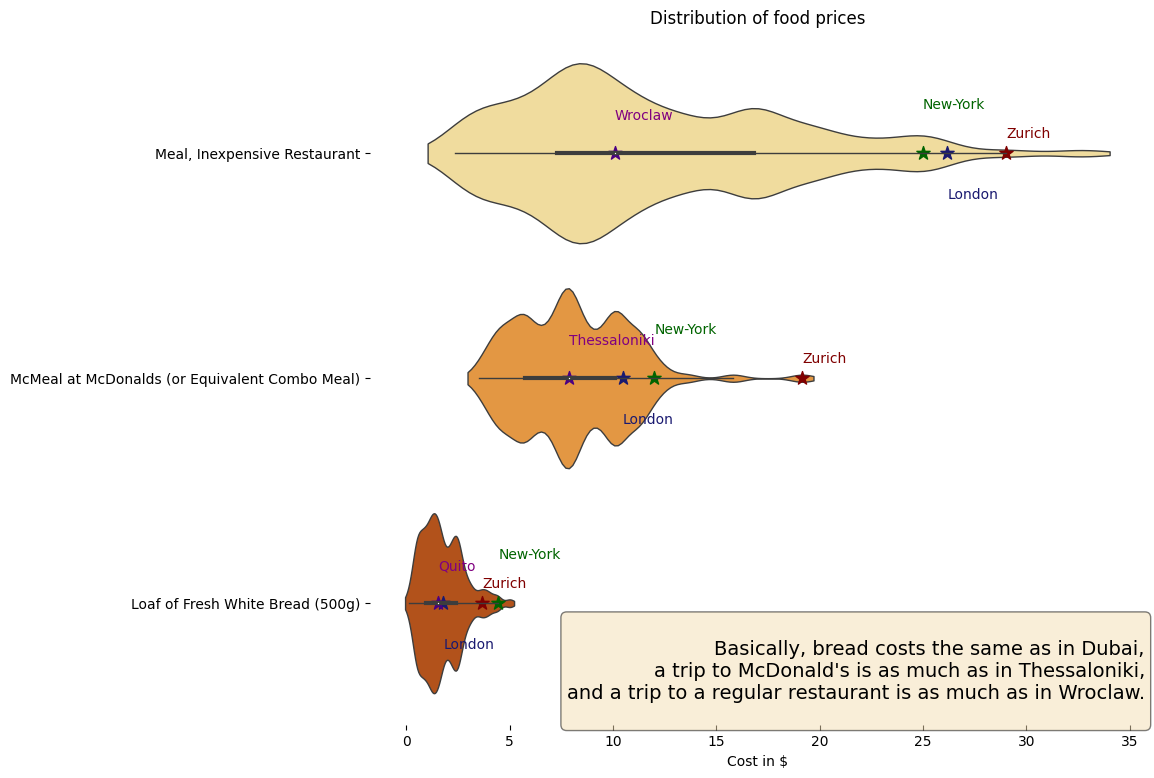

In [30]:
df = df_edit

food_columns = ['Meal, Inexpensive Restaurant', 
                'McMeal at McDonalds (or Equivalent Combo Meal)', 
                'Loaf of Fresh White Bread (500g)']
df_food = df[food_columns].stack().reset_index()

df_food.columns = ['Cities', 'Food', 'Cost']

fig, ax = plt.subplots(figsize=(10,9))

sns.violinplot(y='Food', x='Cost', data=df_food, palette="YlOrBr", orient="h", scale="count", bw=.2, cut=1, linewidth=1, ax=ax)
ax.set_title('Distribution of food prices')
ax.set_xlabel('Cost in $')
ax.set_ylabel('')

cities_to_annotate = ['New-York', 'Zurich', 'London']
colors = ['darkgreen', 'maroon', 'midnightblue'] 
offsets = [-0.2, -0.07, 0.2]  
for offset, city, color in zip(offsets, cities_to_annotate, colors):
    city_data = df.loc[city]
    for i, food in enumerate(food_columns):
        price = city_data[food]
        ax.scatter(price, i, marker='*', color=color, s=100)  
        ax.text(price, i+offset, city, color=color) 

for i, food in enumerate(food_columns):
    median_price = df[food].median()  
    median_city_name = (df[food] - median_price).abs().idxmin()  
    price = df.loc[median_city_name, food]
    ax.scatter(price, i, marker='*', color='indigo', s=100)  
    ax.text(price, i-0.15, median_city_name, color='purple')  

textstr = """
Basically, bread costs the same as in Dubai,
a trip to McDonald's is as much as in Thessaloniki,
and a trip to a regular restaurant is as much as in Wroclaw.
"""

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1, 0, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', horizontalalignment='right', bbox=props)


sns.despine(left=True, bottom=True)
plt.show()

In [31]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="YlOrBr", rc=custom_params)

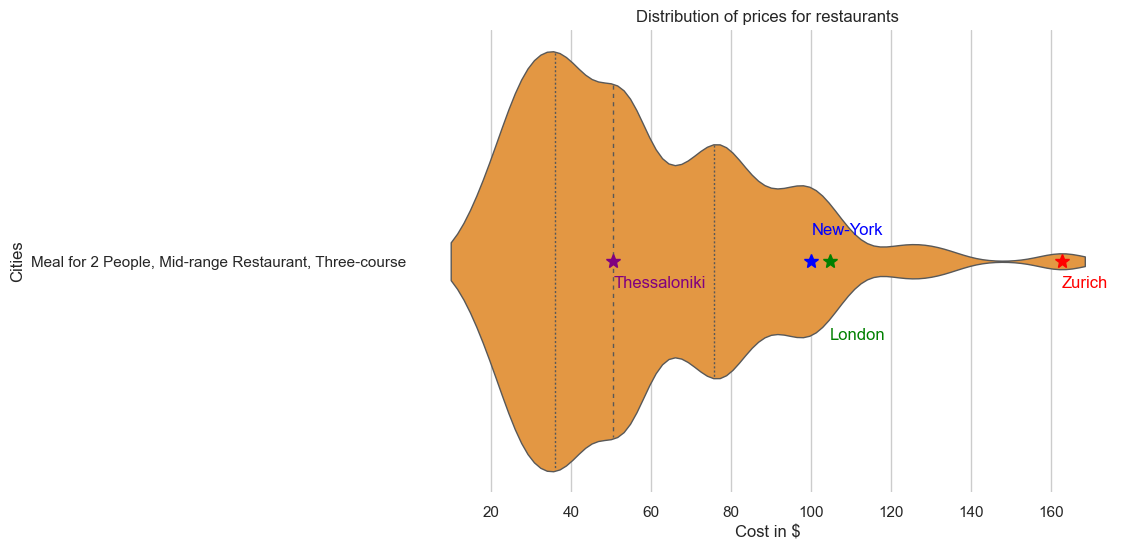

In [32]:
selected_categories = ['Meal for 2 People, Mid-range Restaurant, Three-course']

df = df_edit
df_selected = df[selected_categories]

plt.figure(figsize=(9,6))
sns.violinplot(data=df_selected, inner = 'quartile', palette="YlOrBr", orient="h", scale="count", bw=.2, cut=1, linewidth=1)
plt.title('Distribution of prices for restaurants')
plt.xlabel('Сost in $')

median_city = df_selected.mean(axis=1).median()  
median_city_name = (df_selected.mean(axis=1) - median_city).abs().idxmin()
median_city_price = df_selected.loc[median_city_name][0]
plt.plot(median_city_price, 0, marker='*', color='purple', markersize=10)  
plt.text(median_city_price, 0.05, median_city_name, color='purple') 

cities_to_annotate = ['Zurich', 'London', 'New-York']
colors = ['red', 'green', 'blue']  
offsets = [0.05, 0.15, -0.05]  
for city, color, offset in zip(cities_to_annotate, colors, offsets):
    city_price = df_selected.loc[city][0]
    plt.plot(city_price, 0, marker='*', color=color, markersize=10)  
    plt.text(city_price, offset, city, color=color)  

sns.despine(left=True, bottom=True)
plt.show()


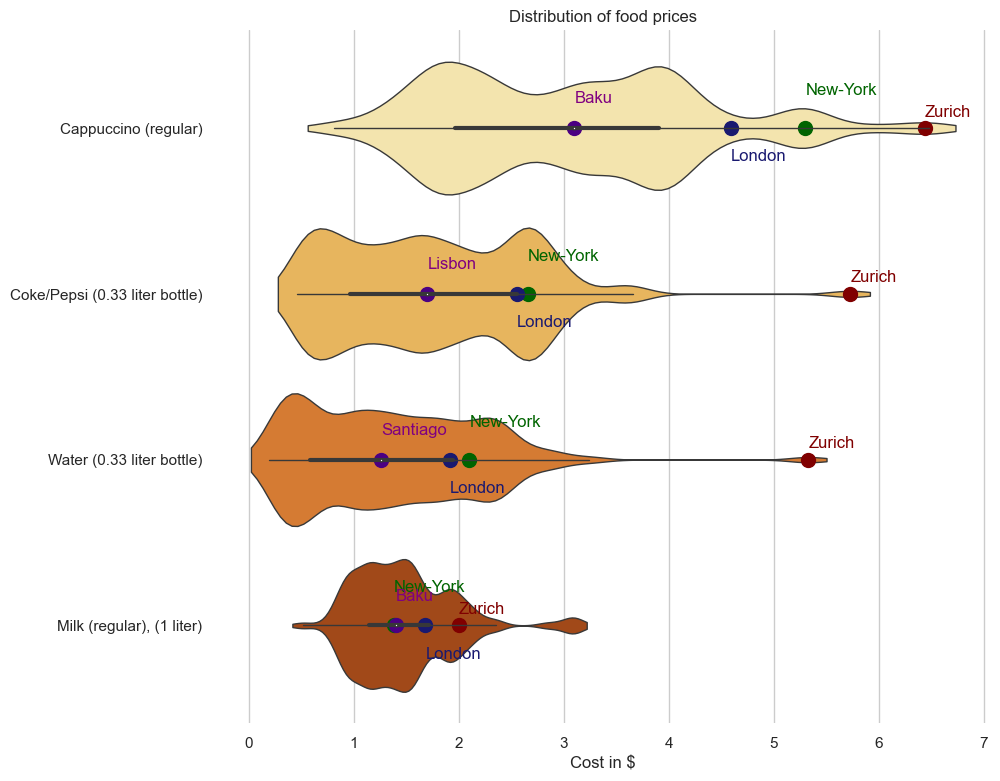

In [33]:
df = df_edit

food_columns = ['Cappuccino (regular)', 
                'Coke/Pepsi (0.33 liter bottle)', 
                'Water (0.33 liter bottle)',
                'Milk (regular), (1 liter)']
df_food = df[food_columns].stack().reset_index()

df_food.columns = ['Cities', 'Food', 'Cost']

plt.figure(figsize=(10,9))

sns.violinplot(y='Food', x='Cost', data=df_food, palette="YlOrBr", orient="h", scale="count", bw=.2, cut=1, linewidth=1)
plt.title('Distribution of food prices')
plt.xlabel('Cost in $')
plt.ylabel('')

cities_to_annotate = ['New-York', 'Zurich', 'London']
colors = ['darkgreen', 'maroon', 'midnightblue']  
offsets = [-0.2, -0.07, 0.2]  
for offset, city, color in zip(offsets, cities_to_annotate, colors):
    city_data = df.loc[city]
    for i, food in enumerate(food_columns):
        price = city_data[food]
        plt.scatter(price, i, color=color, s=100)  
        plt.text(price, i+offset, city, color=color)  


for i, food in enumerate(food_columns):
    median_price = df[food].median()  
    median_city_name = (df[food] - median_price).abs().idxmin()  
    price = df.loc[median_city_name, food]
    plt.scatter(price, i, color='indigo', s=100)  
    plt.text(price, i-0.15, median_city_name, color='purple')  

sns.despine(left=True, bottom=True)
plt.show()


We see that the cost of drinks fluctuate significantly less than the cost of food, and even less than the cost of going to a good restaurant.

## Conclusions. 



## You need to go to Chicago. There are high salaries and affordable housing at the same time.

## P.S. is not an investment recommendation, since when making a decision about moving, you need to look at such parameters as the state of the environment, education and medicine. All these parameters were not considered in our study. 

## P.P.S. Coffee will be able to buy more or less everywhere, because prices for it fluctuate within reasonable limits.